In [197]:
import os

import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, DiscriminationThreshold, PrecisionRecallCurve, ROCAUC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score


diff_dataset = False

data_path = Path("../../data").resolve()
os.makedirs(data_path, exist_ok=True)

tracks_df = pd.read_parquet(data_path / "tracks.pq")

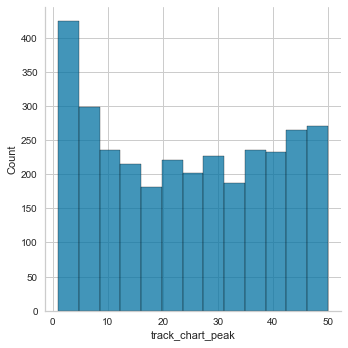

In [198]:
sns.displot(tracks_df["track_chart_peak"])

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_chart_months', ylabel='Density'>

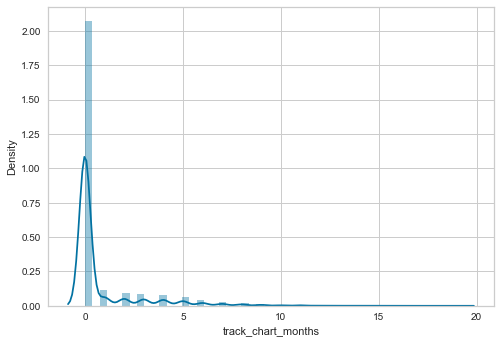

In [199]:
sns.distplot((tracks_df["track_chart_months"]))

In [200]:
print(len(tracks_df[tracks_df["track_chart_months"] > 5]))
print(len(tracks_df[tracks_df["track_chart_months"] > 4]))
print(len(tracks_df[tracks_df["track_chart_months"] > 3]))
print(len(tracks_df[tracks_df["track_chart_months"] > 2]))
print(len(tracks_df[tracks_df["track_chart_months"] > 1]))
print(len(tracks_df[tracks_df["track_chart_months"] == 1]))

671
1035
1498
2000
2545
650


In [201]:
def chart_status(track):
    if track["track_chart_peak"] == 1:
        return "peaked"
    elif track["track_chart_months"] > 3:
        return "charted_3months"
    elif track["track_chart_months"] >= 1:
        return "charted"
    else:
        return "uncharted"


def chart_months(track):
    return track["track_chart_months"] if track["track_chart_months"] <= 5 else 5


tracks_df["chart_status"] = tracks_df.apply(chart_status, axis=1)
tracks_df["chart_months"] = tracks_df.apply(chart_months, axis=1)

audio_features = [
    "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "tempo", "time_signature",
    "chart_months", "chart_status",
]


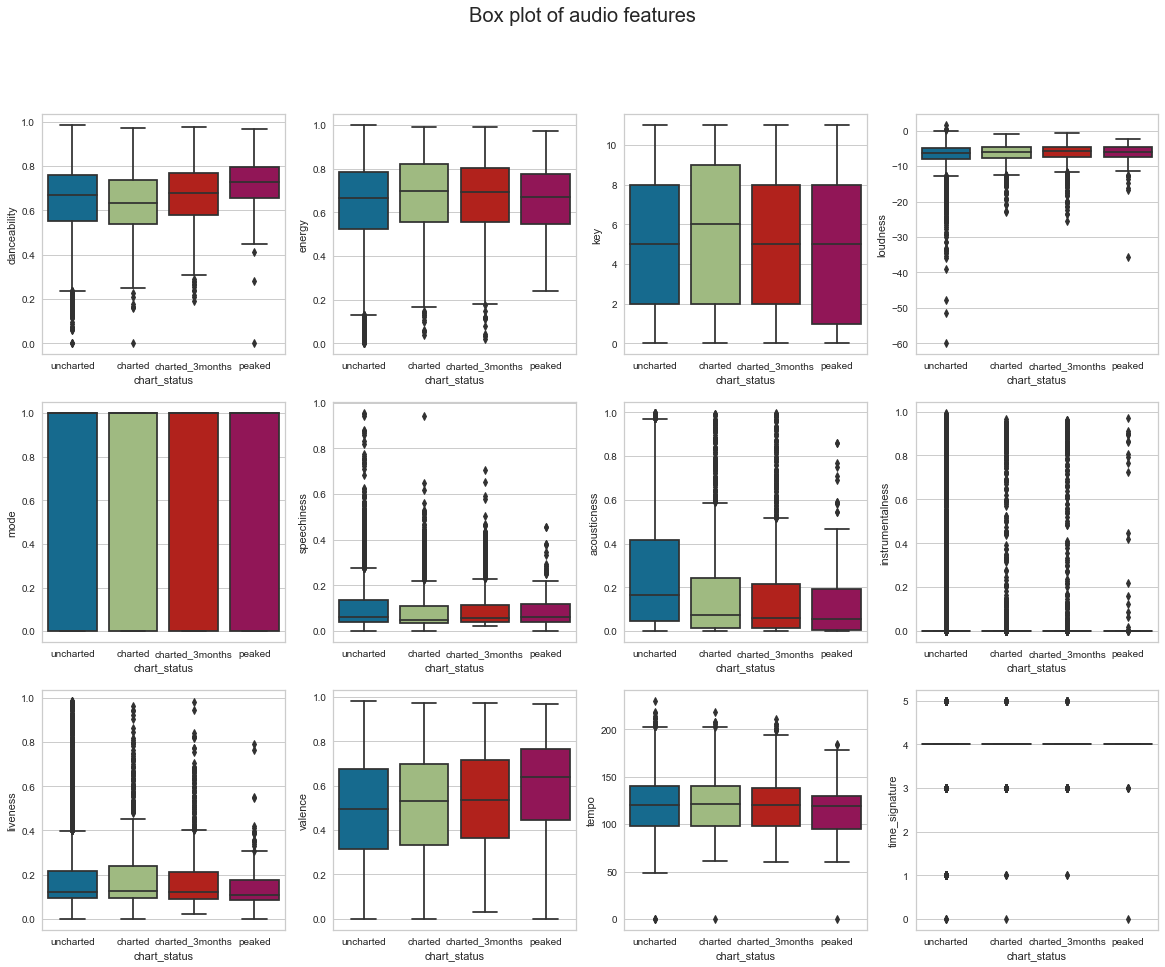

In [202]:
import matplotlib.pyplot as plt

# df_ = tracks_df[tracks_df["chart_status"] != "uncharted"][audio_features]
df_ = tracks_df[audio_features]


#sns.kdeplot(data=df_, x="danceability", hue="chart_status")

ncols = 4
nrows = int(len(audio_features) / 4)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
fig.suptitle("Box plot of audio features", fontsize=20)

for row in range(nrows):
    for col in range(ncols):
        idx = (row * ncols) + (col + 1) - 1
        if idx > len(audio_features):
            break
        sns.boxplot(data=df_, x="chart_status", y=audio_features[idx], ax=axs[row, col],
                    order=["uncharted", "charted", "charted_3months", "peaked"])

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

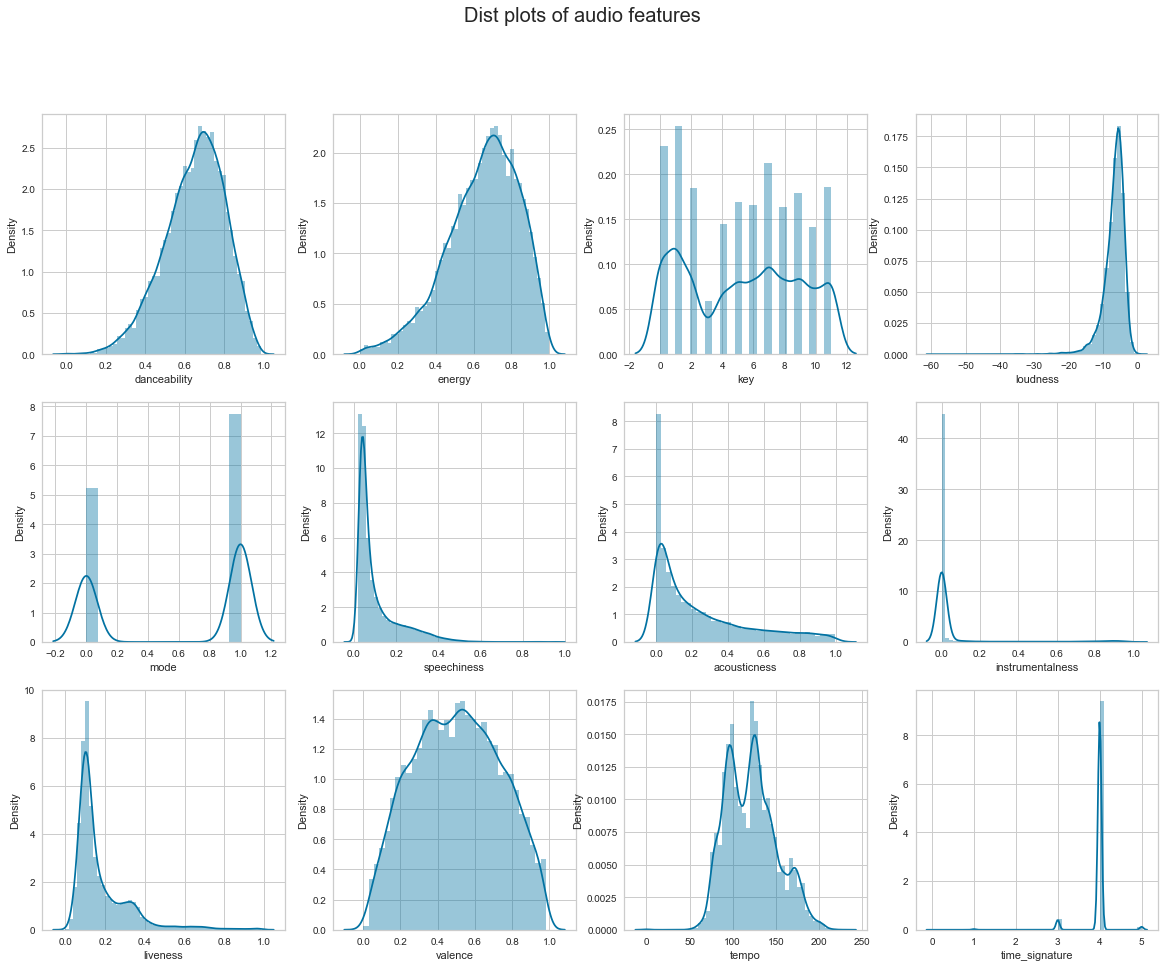

In [203]:
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
fig.suptitle("Dist plots of audio features", fontsize=20)

ncols = 4
nrows = int(len(audio_features) / 4)

for row in range(nrows):
    for col in range(ncols):
        idx = (row * ncols) + (col + 1) - 1
        if idx > len(audio_features):
            break
        sns.distplot(df_[audio_features[idx]], ax=axs[row, col]),
                    #order=["uncharted", "charted", "charted_3months", "peaked"])

<AxesSubplot:xlabel='tempo', ylabel='Density'>

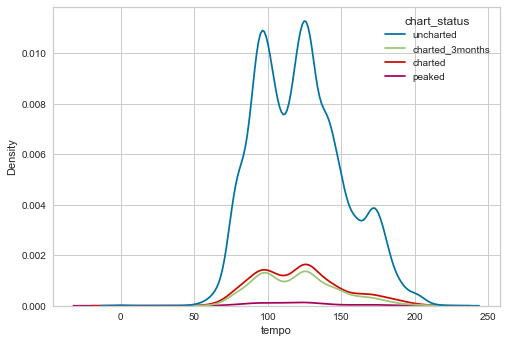

In [204]:
sns.kdeplot(data=df_, x="tempo", hue="chart_status")

In [205]:
tracks_df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'duration_ms', 'year',
       'release_date', 'popularity', 'audio_features', 'isrc', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_chart_months', 'track_chart_indicativerevenue',
       'track_chart_peak', 'track_chart_mean', 'track_chart_median',
       'recording_award_category', 'recording_award_nominee',
       'recording_award_winner', 'album_award_category', 'album_award_nominee',
       'album_award_winner', 'num_artists', 'artist_matched', 'artist_names',
       'artist_genres', 'artist_popularity', 'artist_first_release',
       'artist_lifetime_releases', 'artist_gender', 'artist_country',
       'artist_hometown', 'artist_first_win', 'artist_first_nomination',
       'artist_lifetime_wins', 'artist_lifetime_nominations',
    

In [206]:
tracks_df["has_female_artist"] = tracks_df["artist_gender"].apply(lambda gender: int("female" in gender))

artist_features = [
    "artist_first_release",
    # "has_female_artist",
    #"artist_first_win",
    #"artist_first_nomination",
    #"artist_first_chart_year",
    "artist_chart_tracks",
    #"artist_chart_peak",
    "artist_nominations",
    "artist_wins",
    "artist_releases",
    "artist_chart_months",
    "artist_chart_months_recently",
    "artist_releases_recently",
    "major_label",
]

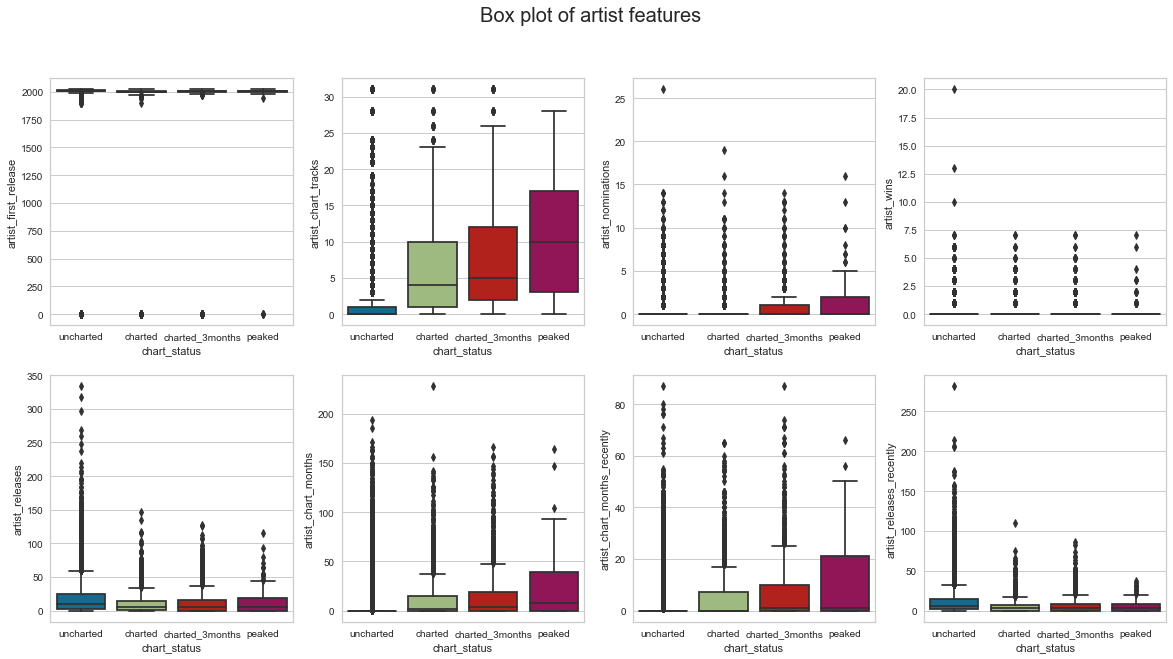

In [207]:
ncols = 4
nrows = int(len(artist_features) / 4)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
fig.suptitle("Box plot of artist features", fontsize=20)

for row in range(nrows):
    for col in range(ncols):
        idx = (row * ncols) + (col + 1) - 1
        if idx > len(artist_features):
            break
        sns.boxplot(data=tracks_df, x="chart_status", y=artist_features[idx], ax=axs[row, col],
                    order=["uncharted", "charted", "charted_3months", "peaked"])

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

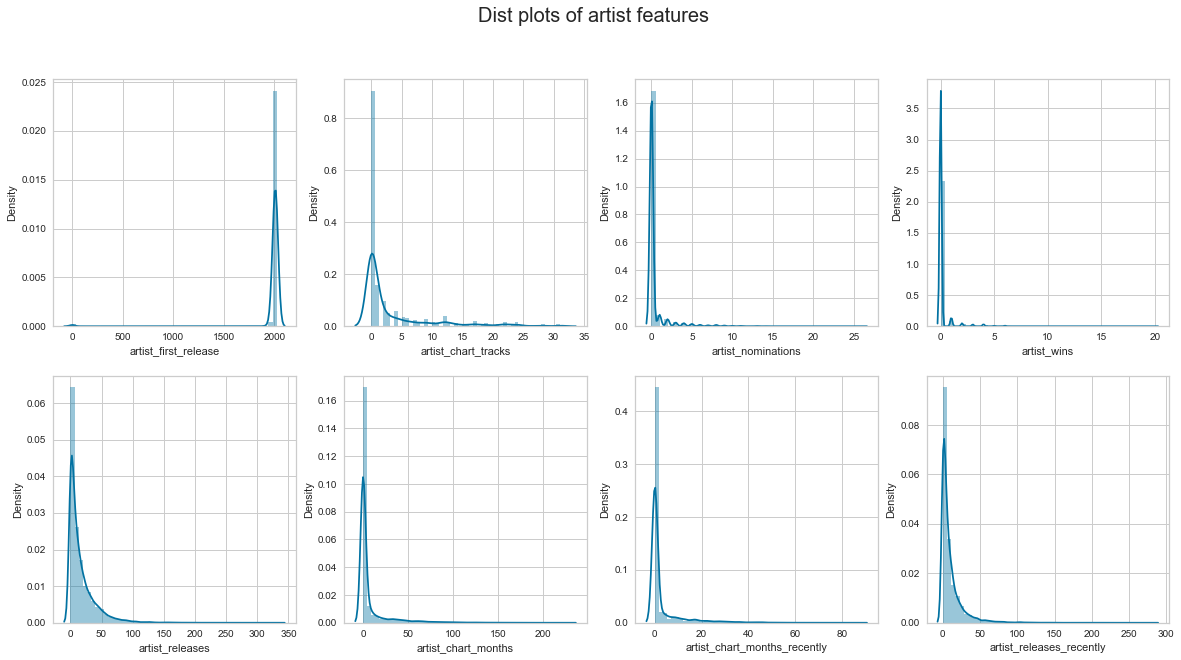

In [208]:
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
fig.suptitle("Dist plots of artist features", fontsize=20)

ncols = 4
nrows = int(len(artist_features) / 4)

for row in range(nrows):
    for col in range(ncols):
        idx = (row * ncols) + (col + 1) - 1
        if idx > len(artist_features):
            break
        sns.distplot(tracks_df[artist_features[idx]], ax=axs[row, col]),
        #order=["uncharted", "charted", "charted_3months", "peaked"])

In [209]:
# null model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

model_df = tracks_df[artist_features + ["track_chart_months"]].drop(columns="major_label")
model_df = model_df.dropna()

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

accuracy = accuracy_score(y_test, [1] * len(y_test))
precision = precision_score(y_test,  [1] * len(y_test))
f1 = f1_score(y_test,  [1] * len(y_test))

print(f"null score: accuracy={1 - accuracy:.5f}, precision={1 - precision:.5f}, f1={1 - f1:.5f}")

null score: accuracy=0.79198, precision=0.79198, f1=0.65560


In [210]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8897, 8), (8897,), (5932, 8), (5932,))

train score: 0.80364, accuracy=0.80364, precision=0.51818, f1=0.55354
test score: 0.79754, accuracy=0.79754, precision=0.51129, f1=0.55436


/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


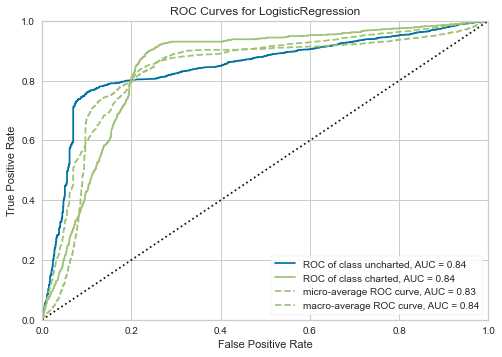

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


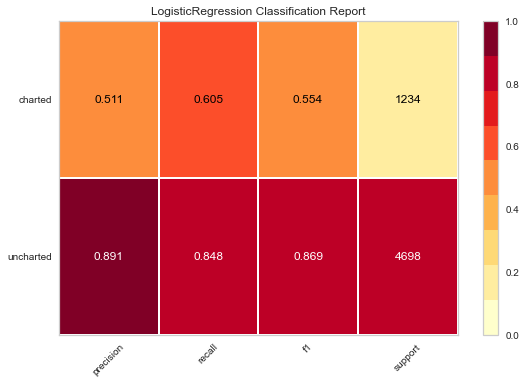

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


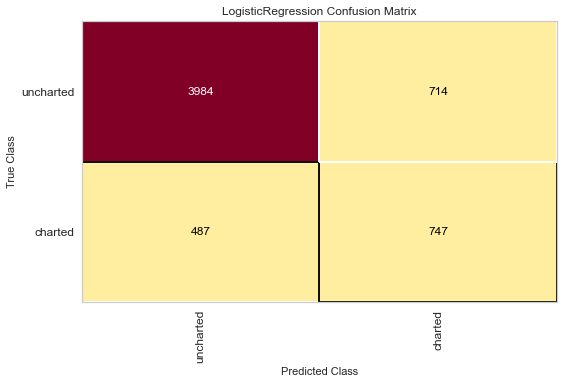

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


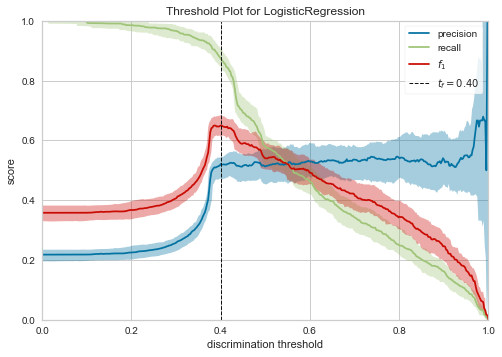

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


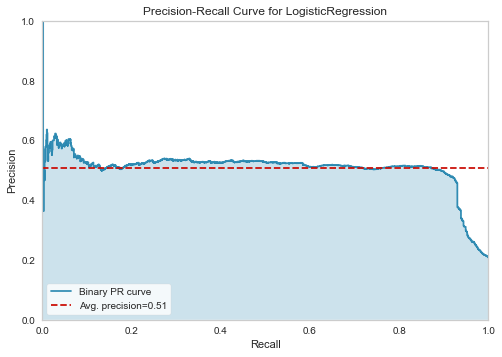

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [212]:
model_df = tracks_df[artist_features + ["track_chart_months"]].drop(columns="major_label")
model_df = model_df.dropna()

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

lr_artist = LogisticRegression(max_iter=1000, class_weight="balanced")
lr_artist.fit(X_train, y_train)

train_score = lr_artist.score(X_train, y_train)
test_score = lr_artist.score(X_test, y_test)

train_accuracy = accuracy_score(y_train, lr_artist.predict(X_train))
train_precision = precision_score(y_train, lr_artist.predict(X_train))
train_f1 = f1_score(y_train, lr_artist.predict(X_train))

test_accuracy = accuracy_score(y_test, lr_artist.predict(X_test))
test_precision = precision_score(y_test, lr_artist.predict(X_test))
test_f1 = f1_score(y_test, lr_artist.predict(X_test))

print(f"train score: {train_score:.5f}, accuracy={train_accuracy:.5f}, precision={train_precision:.5f}, f1={train_f1:.5f}")
print(f"test score: {test_score:.5f}, accuracy={test_accuracy:.5f}, precision={test_precision:.5f}, f1={test_f1:.5f}")

# model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(lr_artist, classes=["uncharted", "charted"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ClassificationReport(lr_artist, classes=["uncharted", "charted"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ConfusionMatrix(lr_artist, classes=["uncharted", "charted"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = DiscriminationThreshold(lr_artist, exclude=["queue_rate"])
visualizer.fit(X_test, y_test)
visualizer.show()

viz = PrecisionRecallCurve(lr_artist)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [190]:
(y_test == 0).sum()

4698

In [183]:
pd.DataFrame(np.exp(lr_artist.coef_), columns=X.columns)

,artist_first_release,artist_chart_tracks,artist_nominations,artist_wins,artist_releases,artist_chart_months,artist_chart_months_recently,artist_releases_recently
0,0.999693,1.282659,0.997451,0.742965,1.008946,0.97044,1.025539,0.951757


train score: 0.80364, accuracy=0.57408, precision=0.29271, f1=0.40809
test score: 0.79754, accuracy=0.55769, precision=0.26752, f1=0.38115


/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


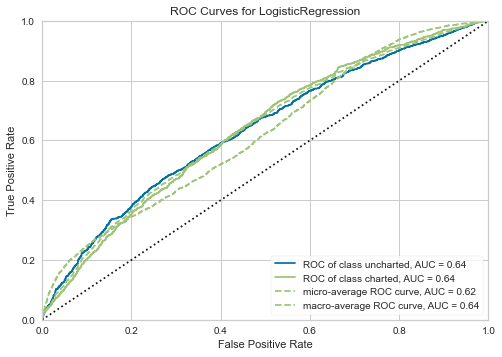

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


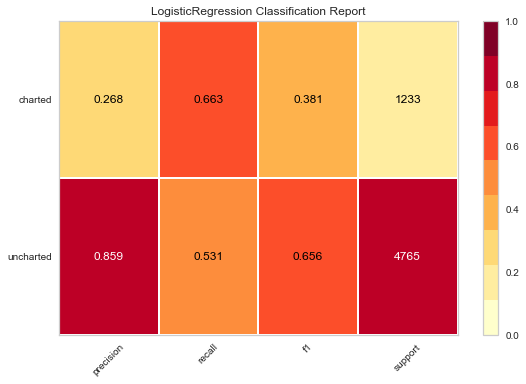

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


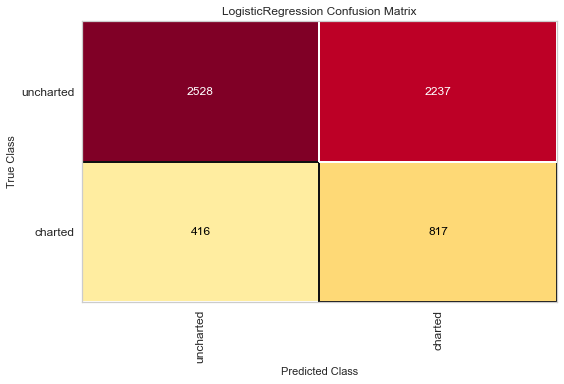

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


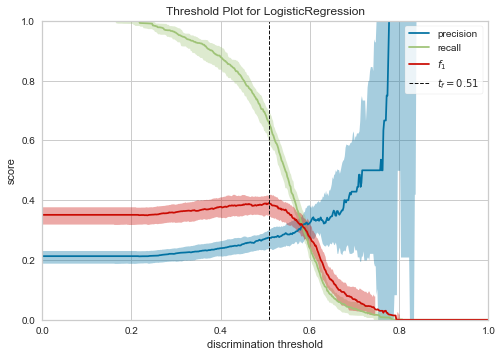

/Users/pez/.conda/envs/dataspell-2/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


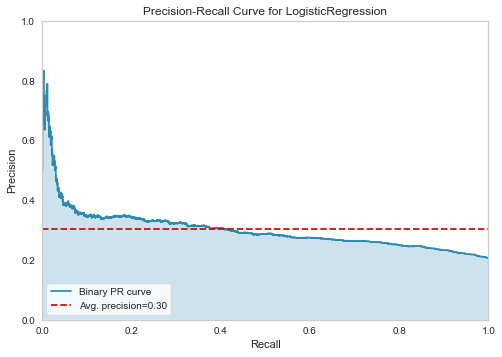

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [213]:
# model using audio features...

model_df = tracks_df[audio_features + ["track_chart_months"]].drop(columns=["chart_status", "chart_months"])
model_df = model_df.dropna()

X = model_df.drop(columns=["track_chart_months"])
y = (model_df["track_chart_months"] >= 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

lr_audio = LogisticRegression(max_iter=1000, class_weight="balanced")
lr_audio.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, lr_audio.predict(X_train))
train_precision = precision_score(y_train, lr_audio.predict(X_train))
train_f1 = f1_score(y_train, lr_audio.predict(X_train))

test_accuracy = accuracy_score(y_test, lr_audio.predict(X_test))
test_precision = precision_score(y_test, lr_audio.predict(X_test))
test_f1 = f1_score(y_test, lr_audio.predict(X_test))

print(f"train score: {train_score:.5f}, accuracy={train_accuracy:.5f}, precision={train_precision:.5f}, f1={train_f1:.5f}")
print(f"test score: {test_score:.5f}, accuracy={test_accuracy:.5f}, precision={test_precision:.5f}, f1={test_f1:.5f}")

visualizer = ROCAUC(lr_audio, classes=["uncharted", "charted"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ClassificationReport(lr_audio, classes=["uncharted", "charted"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = ConfusionMatrix(lr_audio, classes=["uncharted", "charted"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

visualizer = DiscriminationThreshold(lr_audio, exclude=["queue_rate"])
visualizer.fit(X_test, y_test)
visualizer.show()

viz = PrecisionRecallCurve(lr_audio)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [159]:
pd.DataFrame(np.exp(lr_audio.coef_), columns=X.columns)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.510661,0.424783,1.013186,0.99589,1.166671,0.641654,0.109542,2.811981,0.759588,2.616993,0.99718,1.129434
